# 🏠 Melbourne Housing Market Analysis
Analysis and regression modeling using real estate data from Melbourne, Australia.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## 🧹 Data Cleaning

In [3]:
# Drop columns with many missing values
df = df.drop(columns=["BuildingArea", "YearBuilt", "CouncilArea", "Car", "Propertycount", "Postcode"])

# Drop rows with missing values
df = df.dropna()

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Suburb      13580 non-null  object        
 1   Address     13580 non-null  object        
 2   Rooms       13580 non-null  int64         
 3   Type        13580 non-null  object        
 4   Price       13580 non-null  float64       
 5   Method      13580 non-null  object        
 6   SellerG     13580 non-null  object        
 7   Date        13580 non-null  datetime64[ns]
 8   Distance    13580 non-null  float64       
 9   Bedroom2    13580 non-null  float64       
 10  Bathroom    13580 non-null  float64       
 11  Landsize    13580 non-null  float64       
 12  Lattitude   13580 non-null  float64       
 13  Longtitude  13580 non-null  float64       
 14  Regionname  13580 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(6)
memory usage: 1.

## 📊 Exploratory Analysis

In [4]:
# Average price by suburb
df.groupby("Suburb")["Price"].mean().sort_values(ascending=False).head(10)

Suburb
Kooyong         2.185000e+06
Canterbury      2.180241e+06
Middle Park     2.082529e+06
Albert Park     1.941355e+06
Brighton        1.930158e+06
Balwyn          1.869879e+06
Eaglemont       1.831696e+06
Balwyn North    1.793405e+06
Malvern         1.764993e+06
Kew             1.758435e+06
Name: Price, dtype: float64

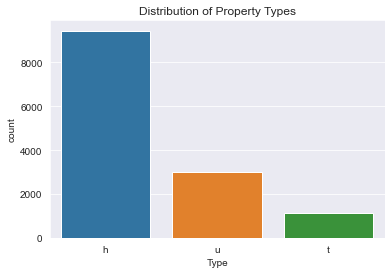

In [5]:
# Distribution of house types
sns.countplot(data=df, x="Type")
plt.title("Distribution of Property Types")
plt.show()

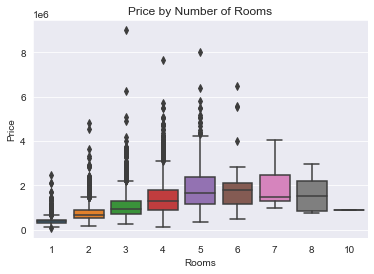

In [6]:
# Price vs. Rooms
sns.boxplot(data=df, x="Rooms", y="Price")
plt.title("Price by Number of Rooms")
plt.show()

## 🤖 Simple Price Prediction Model

In [7]:
# Use only numeric features
X = df[["Rooms", "Distance", "Landsize", "Bathroom"]]
y = df["Price"]

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
preds = model.predict(X_test)
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 264505784370.28


### 📈 Additional Evaluation

In [8]:
# R² score (coefficient of determination)
r2 = model.score(X_test, y_test)
print(f"R^2 Score: {r2:.2f}")

R^2 Score: 0.38


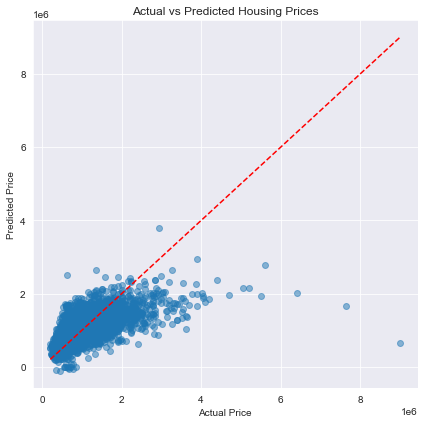

In [9]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, preds, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

In [10]:
# Coefficients of the model
coef_df = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
coef_df

,Coefficient
Rooms,288579.745459
Distance,-34822.193120
Landsize,3.619873
Bathroom,234158.361185
